<a href="https://colab.research.google.com/github/ndeleonardis/DataSetNoeliaDeLeonardis/blob/main/Fondos_Comunes_de_Inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargamaos el archivo usamos URL cruda del archivo CSV que esta en nuestro GitHub
url = 'https://raw.githubusercontent.com/ndeleonardis/DataSetNoeliaDeLeonardis/main/rescates.csv'


# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(url)
    print("El archivo CSV se ha cargado exitosamente.")
except Exception as e:
    print("Se produjo un error al cargar el archivo CSV:", e)

El archivo CSV se ha cargado exitosamente.


In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FechaConcertacion  106 non-null    object
 1   CantidadRegistros  106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [3]:

# Utilizamos el comando describe () para ver valores estadisticos como la media, valor mínimo, valor máximo etc. Al comando le aplique un formato de estilo ya que
#lo mostraba en notacion exponencial/cientifica y me dificultaba leerlo.
#df.describe ()
descripcion = df.describe().style.format("{:.2f}")
display(descripcion)

,CantidadRegistros
count,106.00
mean,1907.50
std,337.20
min,1067.00
25%,1674.25
50%,1892.00
75%,2055.50
max,3184.00


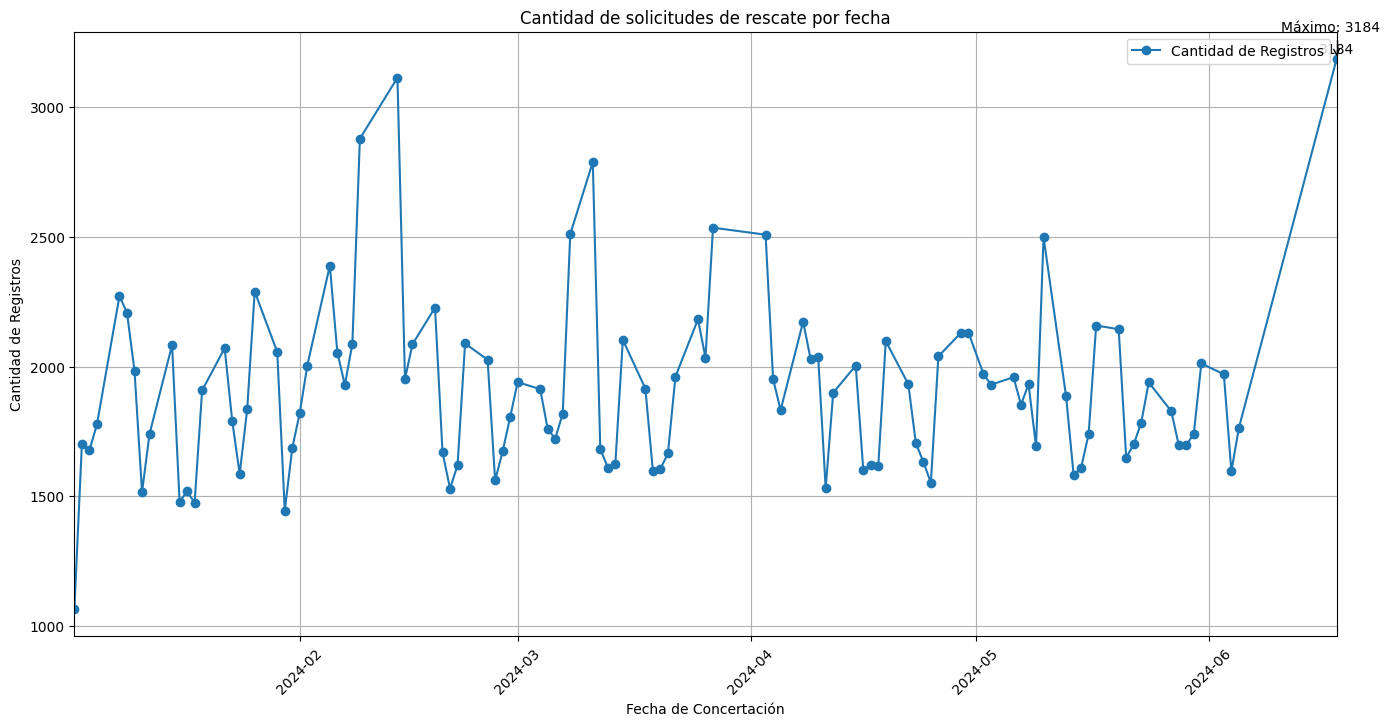

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un dataframe llamado 'df' con las columnas FechaConcertacion y CantidadRegistros

# Convertir la columna FechaConcertacion a tipo datetime si no está en ese formato
df['FechaConcertacion'] = pd.to_datetime(df['FechaConcertacion'], format='%Y-%m-%d')

# Ordenar los datos por fecha si no están ordenados
df = df.sort_values(by='FechaConcertacion')

# Crear el gráfico de línea
plt.figure(figsize=(14, 7))  # Aumentar el tamaño de la figura

# Graficar la línea principal
plt.plot(df['FechaConcertacion'], df['CantidadRegistros'], marker='o', linestyle='-', label='Cantidad de Registros')

# Encontrar el valor máximo y su posición en los datos
max_value = df['CantidadRegistros'].max()
max_index = df['CantidadRegistros'].idxmax()

# Mostrar el valor máximo sobre el gráfico
plt.annotate(f'Máximo: {max_value}',
             xy=(df.loc[max_index, 'FechaConcertacion'], max_value),
             xytext=(-40, 20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Personalización de la gráfica
plt.title('Cantidad de solicitudes de rescate por fecha')
plt.xlabel('Fecha de Concertación')
plt.ylabel('Cantidad de Registros')
plt.grid(True)  # Habilitar la cuadrícula
plt.legend()  # Mostrar la leyenda

# Ajustar el rango del eje x para mostrar más detalle
plt.xlim(df['FechaConcertacion'].min(), df['FechaConcertacion'].max())

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño automáticamente
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad si es necesario

# Mostrar el valor máximo claramente sobre el gráfico
plt.text(df.loc[max_index, 'FechaConcertacion'], max_value + 10, f'{max_value}', ha='center', va='bottom')

plt.show()





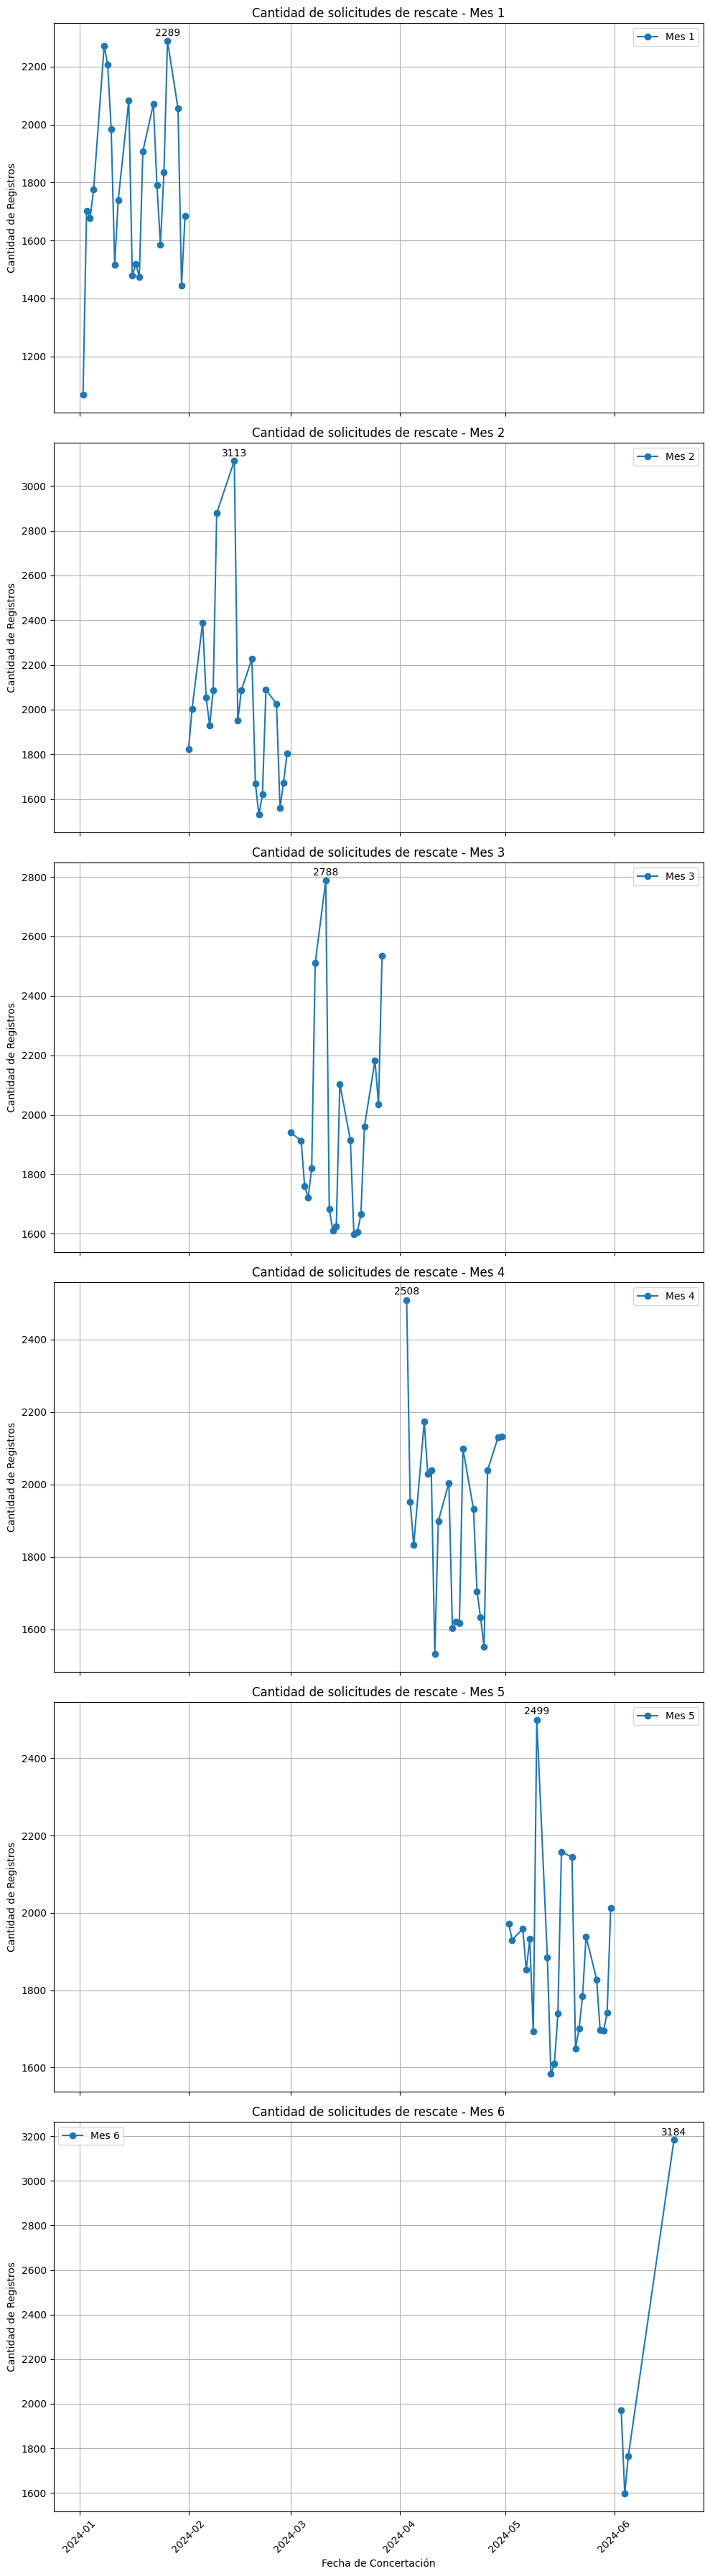

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un dataframe llamado 'df' con las columnas FechaConcertacion y CantidadRegistros
# y que las fechas están en el formato 'aaaa-mm-02'.

# Convertir la columna FechaConcertacion a tipo datetime si no está en ese formato
df['FechaConcertacion'] = pd.to_datetime(df['FechaConcertacion'], format='%Y-%m-%d')

# Agrupar los datos por mes
df['Mes'] = df['FechaConcertacion'].dt.month
meses = df['Mes'].unique()

# Crear una figura y subplots para cada mes
fig, axs = plt.subplots(len(meses), 1, figsize=(10, 6 * len(meses)), sharex=True)

# Iterar sobre cada mes y crear el gráfico correspondiente
for i, mes in enumerate(meses):
    df_mes = df[df['Mes'] == mes]
    axs[i].plot(df_mes['FechaConcertacion'], df_mes['CantidadRegistros'], marker='o', linestyle='-', label=f'Mes {mes}')

    # Etiqueta del valor máximo
    max_value = df_mes['CantidadRegistros'].max()
    max_index = df_mes['CantidadRegistros'].idxmax()
    axs[i].text(df_mes.loc[max_index, 'FechaConcertacion'], max_value + 10, f'{max_value}', ha='center', va='bottom')

    # Personalización del subplot
    axs[i].set_title(f'Cantidad de solicitudes de rescate - Mes {mes}')
    axs[i].set_ylabel('Cantidad de Registros')
    axs[i].grid(True)
    axs[i].legend()

# Personalización adicional
plt.xlabel('Fecha de Concertación')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [16]:
import pandas as pd

# Supongamos que tienes un dataframe llamado 'df' con las columnas FechaConcertacion y CantidadRegistros
# y que las fechas están en el formato 'aaaa-mm-02'.

# Convertir la columna FechaConcertacion a tipo datetime si no está en ese formato
df['FechaConcertacion'] = pd.to_datetime(df['FechaConcertacion'], format='%Y-%m-%d')

# Agrupar los datos por mes y calcular estadísticas
df['Mes'] = df['FechaConcertacion'].dt.month
stats_meses = df.groupby('Mes')['CantidadRegistros'].agg(['min', 'max', 'mean'])

# Mostrar las estadísticas por mes
print("Estadísticas de solicitudes de rescate por mes:")
print(stats_meses)



Estadísticas de solicitudes de rescate por mes:
      min   max         mean
Mes                         
1    1067  2289  1780.409091
2    1530  3113  2027.105263
3    1597  2788  1945.578947
4    1531  2508  1901.300000
5    1583  2499  1863.863636
6    1596  3184  2128.500000
